<a href="https://colab.research.google.com/github/Frederik-Roeckle/HFF_AT_Assignments/blob/master/EUR_USD_LearningWaveletTradingStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!pip install timm

In [ ]:
import timm
import pandas as pd

from fastai.vision.all import *
from fastai.data.all import *
import shutil

Building a datablock

In [ ]:
wavelet = None
dls = None
learn = None

In [ ]:
# Building the datablock
wavelet = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(448, ResizeMethod.Pad, pad_mode="zeros"),
    batch_tfms=aug_transforms(size=448)
)

dls = wavelet.dataloaders(Path("/content/drive/MyDrive/Colab Notebooks/HFF_AT_Assignment_3/data/"))

dls.valid.show_batch(max_n=8, nrows=2)

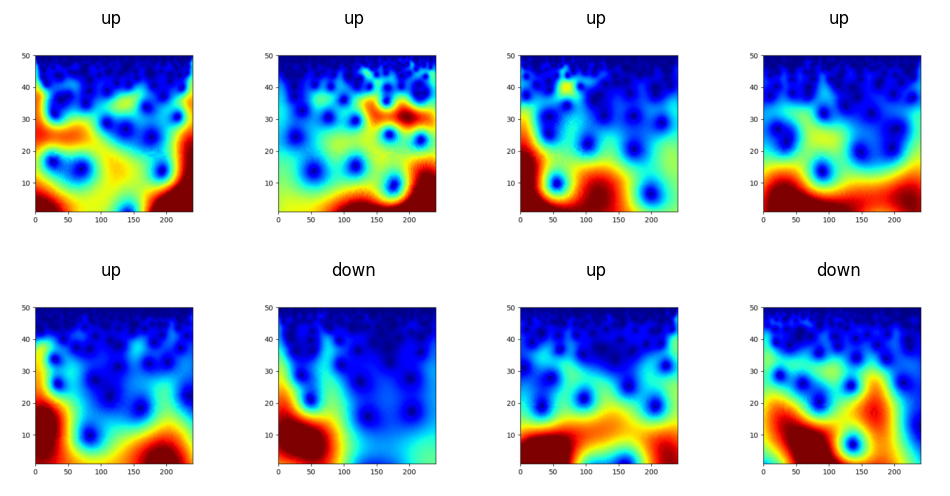

In [ ]:
learn = vision_learner(dls, resnet34, metrics=Precision(average="micro"))
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 203MB/s]


epoch,train_loss,valid_loss,precision_score,time
0,1.882777,1.376376,0.373219,06:22


epoch,train_loss,valid_loss,precision_score,time
0,1.740188,1.735575,0.410256,00:33
1,1.615579,1.240997,0.418803,00:31
2,1.487250,1.311354,0.433048,00:32


In [ ]:
results = learn.validate()
print(f"Loss: {results[0]}, Precision: {results[1]}")

Loss: 1.3113536834716797, Precision: 0.43304843304843305

In [ ]:
learn.show_results()

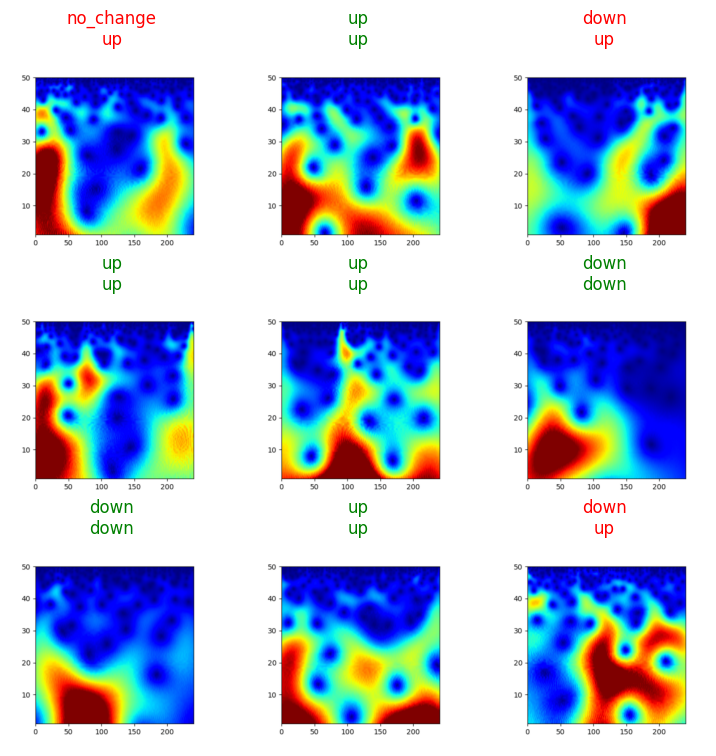

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

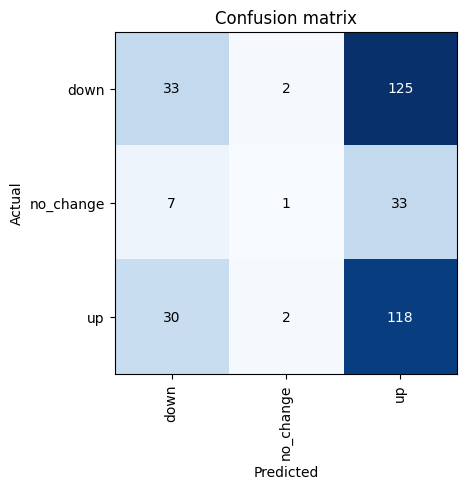

In [ ]:
interp.plot_top_losses(5, nrows=5)

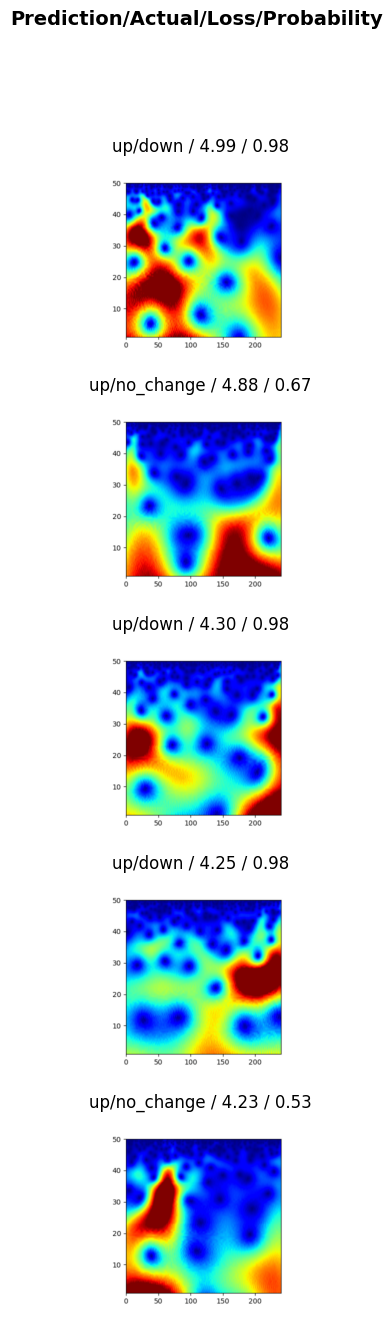

In [ ]:
learn.export("/content/drive/MyDrive/Colab Notebooks/HFF_AT_Assignment_3/squared_model_three_epochs.pkl")